In [ ]:
import pandas as pd 
import numpy as np
import os

In [4]:
train_data = pd.DataFrame({'file': os.listdir(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train")})
train_data 

,file
0,cat.0.jpg
1,cat.1.jpg
2,cat.10.jpg
3,cat.100.jpg
4,cat.1000.jpg
...,...
24995,dog.9995.jpg
24996,dog.9996.jpg
24997,dog.9997.jpg
24998,dog.9998.jpg


In [6]:
train_data = pd.DataFrame({'file': os.listdir(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train")})
train_data 

,file
0,cat.0.jpg
1,cat.1.jpg
2,cat.10.jpg
3,cat.100.jpg
4,cat.1000.jpg
...,...
24995,dog.9995.jpg
24996,dog.9996.jpg
24997,dog.9997.jpg
24998,dog.9998.jpg


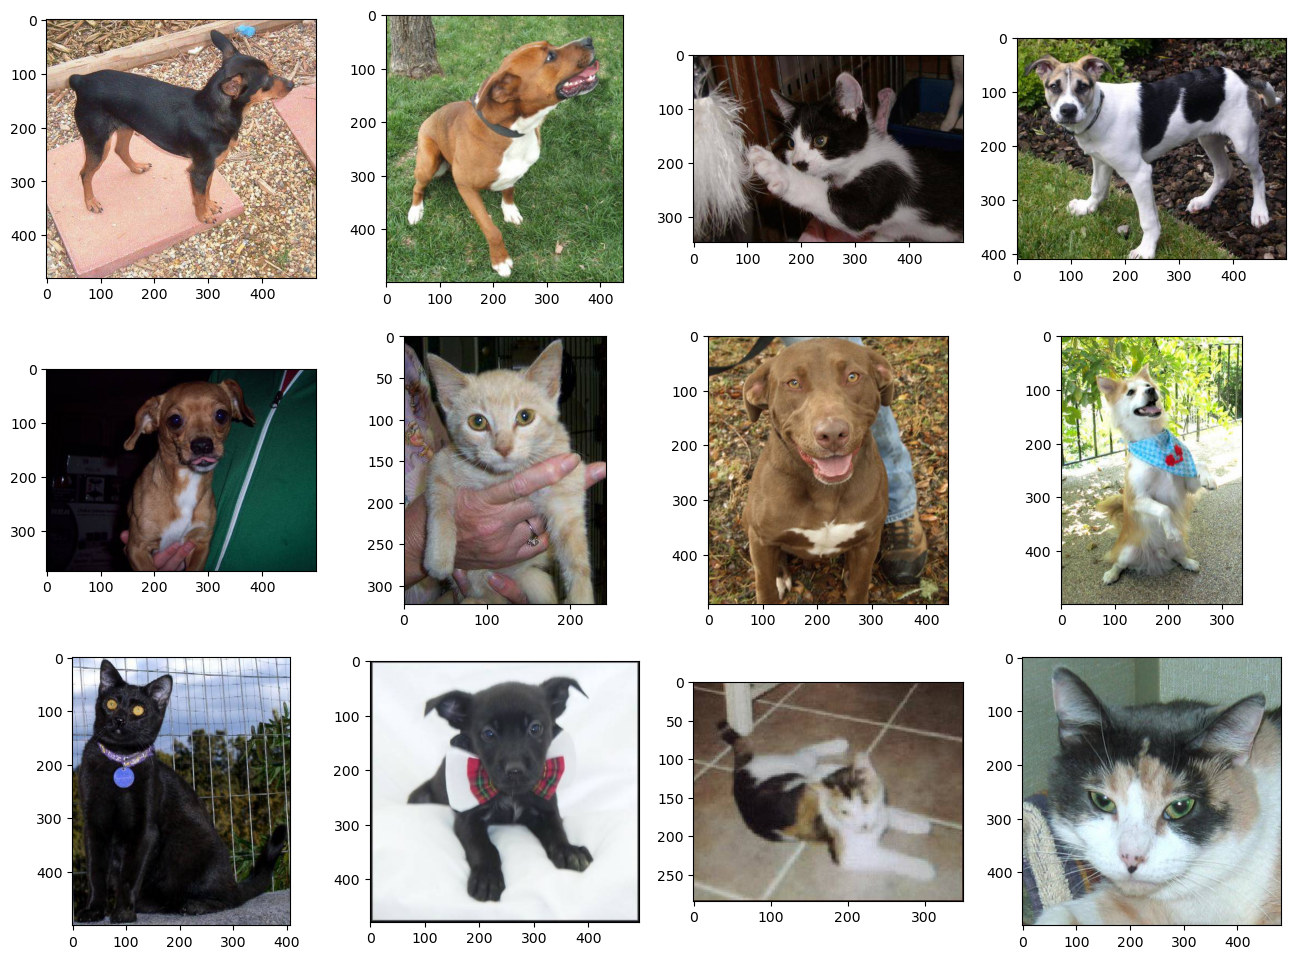

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train")
for i in range(12):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train", img)) 
    fig.imshow(img) 

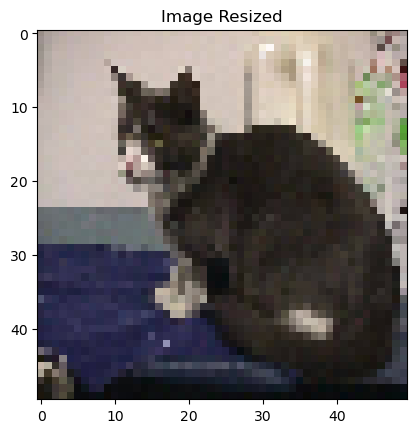

In [9]:
import cv2
import matplotlib.pyplot as plt

image_path = r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train\cat.4.jpg"

image = cv2.imread(image_path)
image_resized = cv2.resize(image, (50, 50))
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title('Image Resized')
plt.show()

In [11]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
import cv2

train_images = os.listdir(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train")
features = []
labels = []
image_size = (50, 50)

for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train"+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)
    
features = np.array(features)
labels = np.array(labels)

Processing Train Images: 100%|██████████████████████████████████████████████████| 25000/25000 [03:19<00:00, 125.22it/s]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
n_components = 0.8
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.528 total time=  18.0s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.525 total time=  18.7s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.537 total time=  18.4s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.570 total time=  16.5s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.560 total time=  15.6s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.564 total time=  15.8s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.504 total time=  11.0s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.485 total time=  12.1s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.492 total time=  11.8s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.507 total time=  10.7s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.495 total time=  10.7s
[CV 3/

In [ ]:
X = np.array(features)
y = np.array(labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
accuracy = best_pipeline.score(X_test, y_test)

In [ ]:
print(" Best Parameters: ", best_params)
print("Best Score: ", best_score)
print("Accuracy:", accuracy)

In [ ]:
y_pred = best_pipeline.predict(X_test)
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:", classification_rep)

In [ ]:

hog_params = {
    'orientations': 8,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'feature_vector': True
}

In [ ]:

image_path = r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train\cat.505.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = resize(image, (64, 64))  # Resize the image to a consistent size
feature = hog(image, **hog_params)
feature = np.array(feature).reshape(1, -1)  # Reshape the feature vector

# Load the pre-trained SVM model
svm_model = joblib.load("svm_model.pkl")

# Make predictions
prediction = svm_model.predict(feature)

# Interpret the prediction
if prediction == 0:
    print("It's a cat!")
else:
    print("It's a dog!")

# Visualize the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Load and preprocess the image you want to predict and visualize
image_path = r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train\dog.5000.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = resize(image, (64, 64))  # Resize the image to a consistent size
feature = hog(image, **hog_params)
feature = np.array(feature).reshape(1, -1)  # Reshape the feature vector

# Load the pre-trained SVM model
svm_model = joblib.load("svm_model.pkl")

prediction = svm_model.predict(feature)
if prediction == 0:
    print("It's a cutiee cat!")
else:
    print("It's a cutiee dog!")

# Visualize the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
data_dir = r'C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_03\\train\\train'

def preprocess_image(image_path, hog_params):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = resize(image, (64, 64))
    feature = hog(image, **hog_params)
    return feature

def plot_images_with_predictions(image_paths, labels, predictions, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    for i, ax in enumerate(axes.flatten()):
        image_path = image_paths[i]
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.axis('off')
        actual_label = 'Cat' if labels[i] == 0 else 'Dog'
        predicted_label = 'Cat' if predictions[i] == 0 else 'Dog'
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.tight_layout()
    plt.show()

random_samples = random.sample(os.listdir(data_dir), 10)

sample_image_paths = []
sample_actual_labels = []
sample_predicted_labels = []

# Load the pre-trained SVM model
svm_model = joblib.load("svm_model.pkl")

# Iterate through the random samples and get predictions
for sample in random_samples:
    sample_image_path = os.path.join(data_dir, sample)
    sample_image_paths.append(sample_image_path)
    if sample.startswith('cat'):
        sample_actual_labels.append(0)
    elif sample.startswith('dog'):
        sample_actual_labels.append(1)
    
    # Preprocess the image and extract HOG features
    sample_feature = preprocess_image(sample_image_path, hog_params)
    sample_feature = sample_feature.reshape(1, -1)
    
    # Predict the label
    sample_prediction = svm_model.predict(sample_feature)
    sample_predicted_labels.append(sample_prediction[0])

# Plot the images with actual and predicted labels
plot_images_with_predictions(sample_image_paths, sample_actual_labels, sample_predicted_labels)